The dataset can be download from Kaggle <br>
https://www.kaggle.com/datasets/parulpandey/palmer-archipelago-antarctica-penguin-data?resource=download

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [43]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/My Git Repo/DataScienceGuide/DataScienceGuide/DataSets/Penguins/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Exploratory Data Analysis

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [34]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


<Axes: >

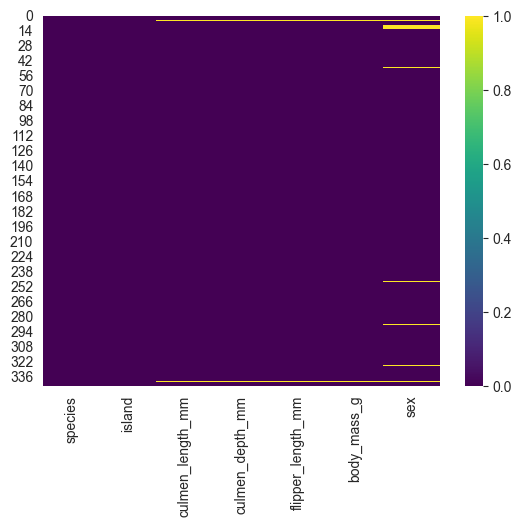

In [35]:
sns.heatmap(df.isnull(),cmap="viridis")

<Axes: xlabel='species', ylabel='count'>

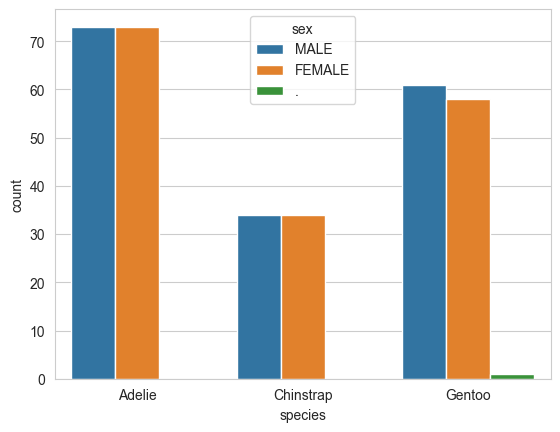

In [36]:
sns.countplot(x=df["species"],hue=df["sex"])

In [45]:
df[df['culmen_length_mm'].isna()]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [46]:
#As these 2 rows have no data, and are less in number, and not part of imbalanced data so we remove them. 
df.drop(index=[3,339],inplace=True)

<Axes: >

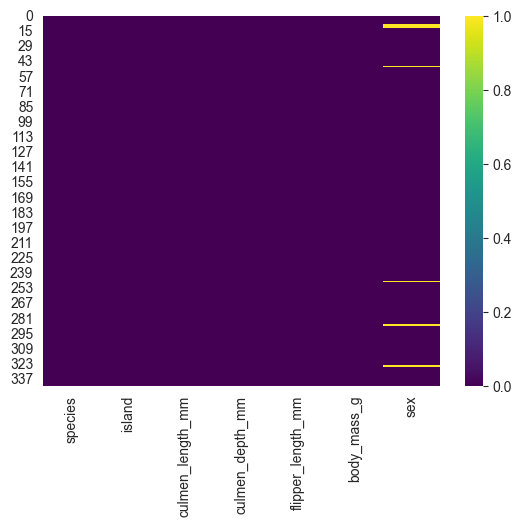

In [47]:
sns.heatmap(df.isnull(),cmap="viridis")

In [48]:
#How many Sex values are missing
sum(df['sex'].isna())

8

In [49]:
df[df['sex'].isna()] 

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN


Now you can <br>
1- Either assign constant such as Male/Female according to your choice to all. <br>
2- See which class they belong to and assign that class highest probability sex choice<br>
3- Use class and body specifications to assign Sex. <br>

I am gonna use 3rd option but using it again take to Question ok, which method for all these columns.<br> 
You can do logistic regression with Sex as output, You can do K Nearest Neighbour by finding sex of closest penguins in specs. 

In [63]:
df2 = pd.get_dummies(df['species'],drop_first=True,prefix="specie")
df2

,specie_Chinstrap,specie_Gentoo
0,0,0
1,0,0
2,0,0
4,0,0
5,0,0
...,...,...
338,0,1
340,0,1
341,0,1
342,0,1


In [83]:
#I am gonna go KNN.Lets drop unnecessary columns for KNN
sexDf= pd.concat([df,df2],axis=1)
indexes_with_missing_sex = sexDf[sexDf['sex'].isna()].index.tolist()
sexDf = sexDf.drop(indexes_with_missing_sex,axis=0)
targetsexDf = sexDf['sex']

In [86]:
sexDf.drop(['species','island','sex'],axis=1,inplace=True)

Now you are ready to Train KNN model to find out your Sex parameter values, Before that scaling is necessary for Distance algorithms <br>
A good Article on Scaling to Choose b/w Standard Scaler/MinMax Scaler<br>
https://forecastegy.com/posts/standardscaler-vs-minmaxscaler-difference/

<b>Highlights of Article </b><br>
It’s important to split your data before scaling because if you scale the entire dataset, you may cause data leakage.<br>
Data leakage occurs when information that is not available in the real world is used to train your machine learning model.This can lead to overfitting and poor performance on new data.In the real world, you will not have access to the mean and standard deviation values for your test data features when training your model.Therefore, you should only use the train data to fit the scaler and then transform both the train and test data.<br>

No, it’s not mandatory to use scaling techniques in every machine learning project.However, many machine learning algorithms, especially those that rely on distance calculations or gradient-based optimization, are sensitive to the scale of the input features.
On the other hand, there are algorithms, such as decision trees and random forests, that are not sensitive to the scale of the input data and do not require scaling.

In [90]:
#Standard Scaling is less suspectible to outliers
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [91]:
X_train, X_test, y_train, y_test = train_test_split(sexDf, targetsexDf, test_size=0.20, random_state=42)

In [98]:
X_train.shape

(267, 6)

In [94]:
X_test.shape

(67, 6)

In [101]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Model Building & Predictions

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
Model = KNeighborsClassifier(n_neighbors=3)

In [104]:
Model.fit(X_train_scaled,y_train)

KNeighborsClassifier(n_neighbors=3)

In [105]:
predictions = Model.predict(X_test_scaled)
predictions

array(['FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'MALE',
       'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE', 'FEMALE',
       'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE',
       'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE',
       'MALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'FEMALE', 'MALE',
       'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'FEMALE',
       'MALE', 'FEMALE', 'FEMALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'FEMALE', 'MALE', 'FEMALE', 'MALE', 'MALE', 'MALE',
       'FEMALE', 'MALE', 'MALE', 'MALE', 'MALE', 'FEMALE', 'FEMALE',
       'FEMALE', 'MALE', 'MALE', 'FEMALE'], dtype=object)

In [109]:
from sklearn.metrics import classification_report,confusion_matrix

<Axes: >

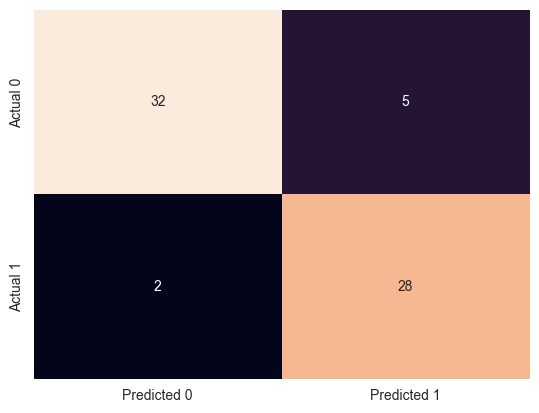

In [111]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt=".0f",cbar=False,xticklabels=['Predicted 0', 'Predicted 1'],yticklabels=['Actual 0', 'Actual 1'])

In [112]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      FEMALE       0.94      0.86      0.90        37
        MALE       0.85      0.93      0.89        30

    accuracy                           0.90        67
   macro avg       0.89      0.90      0.90        67
weighted avg       0.90      0.90      0.90        67



In [51]:
'''Now to find best K in KNN use elbow method'''
error_rate=[]

for i in range(1,40):
    Model = KNeighborsClassifier(n_neighbors=i)
    Model.fit(X_train,y_train)
    predictions = Model.predict(X_test)
    error_rate.append(np.mean(predictions != y_test))

In [52]:
error_rate 

[0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.0,
 0.0,
 0.0,
 0.022222222222222223,
 0.0,
 0.0,
 0.022222222222222223,
 0.044444444444444446,
 0.044444444444444446,
 0.044444444444444446,
 0.022222222222222223,
 0.044444444444444446,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.06666666666666667,
 0.08888888888888889,
 0.1111111111111111,
 0.1111111111111111,
 0.15555555555555556,
 0.15555555555555556,
 0.15555555555555556,
 0.13333333333333333,
 0.15555555555555556,
 0.13333333333333333,
 0.13333333333333333,
 0.1111111111111111]

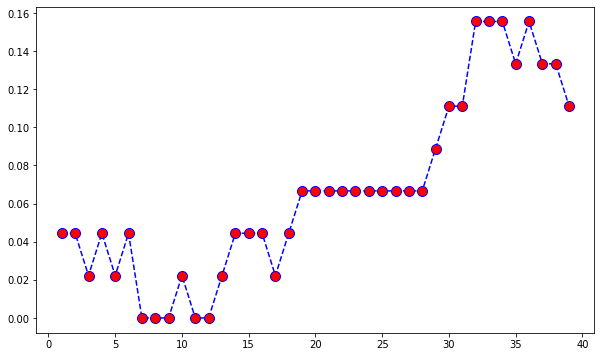

In [61]:
#Linestyle is the way line drwan, marker tells where actually points are in plot
plt.figure(figsize=(10,6)) #To make our graph size bigger
plt.plot(range(1,40),error_rate,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.show()

In [62]:
'''So now after seeing figure you know that at K=7 Your error is minimum , nOW TRAIN YOUR MODEL According to it'''
Model = KNeighborsClassifier(n_neighbors=7)
Model.fit(X_train,y_train)
predictions = Model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print("\n\n\n\n\n")
print(classification_report(y_test,predictions))

[[13  0  0]
 [ 0 20  0]
 [ 0  0 12]]






                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        20
 Iris-virginica       1.00      1.00      1.00        12

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45

